In [2]:
!pip install pystan


In [3]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

In [77]:
warnings.filterwarnings('ignore')

In [78]:
df=pd.read_csv("Sales Dataset 2020.csv")
df.head()

,ID,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,...,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Year-2017,Year-2018,Year-2019,Year-2020,Total Sales,Category
0,2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,...,5361.0,5060.0,2647.0,2826.0,23141.0,32835.0,17433.0,5473.0,78882.0,1
1,4264,14300,67.0,11,42,31,90,107,23.0,80,...,138.0,205.0,116.0,141.0,451.0,727.0,527.0,257.0,1962.0,0
2,2747,10922,2.0,0,1,8,19,20,34.0,36,...,45.0,41.0,24.0,9.0,120.0,374.0,200.0,33.0,727.0,0
3,2746,10921,2.0,2,3,2,5,2,6.0,3,...,11.0,11.0,5.0,3.0,25.0,70.0,47.0,8.0,150.0,0
4,3439,12497,1.0,6,102,0,0,0,-2.0,337,...,1058.0,188.0,104.0,15.0,444.0,339.0,1474.0,119.0,2376.0,0


In [79]:
n = len(pd.unique(df['ID'])) 
  
print("No.of.unique values :",  
      n)

No.of.unique values : 1998


In [80]:
df.head()

,ID,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,...,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Year-2017,Year-2018,Year-2019,Year-2020,Total Sales,Category
0,2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,...,5361.0,5060.0,2647.0,2826.0,23141.0,32835.0,17433.0,5473.0,78882.0,1
1,4264,14300,67.0,11,42,31,90,107,23.0,80,...,138.0,205.0,116.0,141.0,451.0,727.0,527.0,257.0,1962.0,0
2,2747,10922,2.0,0,1,8,19,20,34.0,36,...,45.0,41.0,24.0,9.0,120.0,374.0,200.0,33.0,727.0,0
3,2746,10921,2.0,2,3,2,5,2,6.0,3,...,11.0,11.0,5.0,3.0,25.0,70.0,47.0,8.0,150.0,0
4,3439,12497,1.0,6,102,0,0,0,-2.0,337,...,1058.0,188.0,104.0,15.0,444.0,339.0,1474.0,119.0,2376.0,0


In [86]:
months_list=df.iloc[:,2:39].columns


In [87]:
new_df=df.copy()
new_df.drop(new_df.iloc[:,39:],axis=1,inplace=True)

In [88]:
new_df.head()

,ID,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,...,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20
0,2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,...,1942,708.0,1224.0,2101.0,1735.0,1500.0,380.0,767.0,2000.0,826
1,4264,14300,67.0,11,42,31,90,107,23.0,80,...,15,40.0,110.0,35.0,60.0,42.0,11.0,63.0,120.0,21
2,2747,10922,2.0,0,1,8,19,20,34.0,36,...,12,21.0,12.0,13.0,16.0,11.0,7.0,6.0,7.0,2
3,2746,10921,2.0,2,3,2,5,2,6.0,3,...,1,3.0,5.0,6.0,0.0,2.0,3.0,0.0,2.0,1
4,3439,12497,1.0,6,102,0,0,0,-2.0,337,...,23,65.0,16.0,110.0,62.0,9.0,87.0,8.0,14.0,1


In [8]:
sales_monthwise=list(new_df.iloc[0:1,2:].values.T)
len(sales_monthwise)
                  

37

In [89]:
new_df.iloc[0:1,2:].values

array([[1081.,  150., 4013., 2251., 4059., 6176., 2744., 2667., 2668.,
        2331., 3695., 3999., 3539., 2457., 5605., 1226., 2712., 3434.,
         767.,  402.,  727., 3574.,  200.,  102.,  204., 2205., 2711.,
        1942.,  708., 1224., 2101., 1735., 1500.,  380.,  767., 2000.,
         826.]])

In [90]:
lst=[1081.,  150., 4013., 2251., 4059., 6176., 2744., 2667., 2668.,
        2331., 3695., 3999., 3539., 2457., 5605., 1226., 2712., 3434.,
         767.,  402.,  727., 3574.,  200.,  102.,  204., 2205., 2711.,
        1942.,  708., 1224., 2101., 1735., 1500.,  380.,  767., 2000.,
         826.]
#lst

In [93]:
from fbprophet import Prophet

In [94]:
# Initialize the Model
model=Prophet()

In [95]:
akil.columns

Index(['Months', 'Sales'], dtype='object')

In [157]:
def custom_parser(x):
    return datetime.strptime(x,'%b-%y')
#print(custom_parser('May-17'))

2017-05-01 00:00:00


In [159]:
date_lst=[]
for i in range(len(months_list)):
    date_lst.append(custom_parser(months_list[i]))
#date_lst

In [163]:
akil=pd.DataFrame(list(zip(date_lst,lst)),columns=['Months','Sales'])


In [164]:
akil.columns = ['ds','y']
akil.head()

,ds,y
0,2017-05-01,1081.0
1,2017-06-01,150.0
2,2017-07-01,4013.0
3,2017-08-01,2251.0
4,2017-09-01,4059.0


In [166]:
model.fit(akil)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [167]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [171]:
future_dates.tail()


,ds
397,2021-04-27
398,2021-04-28
399,2021-04-29
400,2021-04-30
401,2021-05-01


In [172]:
prediction=model.predict(future_dates)

In [173]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-01,3899.421258,1854.814714,4125.771878,3899.421258,3899.421258,-911.363773,-911.363773,-911.363773,-911.363773,-911.363773,-911.363773,0.0,0.0,0.0,2988.057485
1,2017-06-01,3817.122469,-16.773110,2102.316540,3817.122469,3817.122469,-2812.050003,-2812.050003,-2812.050003,-2812.050003,-2812.050003,-2812.050003,0.0,0.0,0.0,1005.072466
2,2017-07-01,3737.478480,3944.425554,6295.375976,3737.478480,3737.478480,1383.001698,1383.001698,1383.001698,1383.001698,1383.001698,1383.001698,0.0,0.0,0.0,5120.480178
3,2017-08-01,3655.179691,1021.795889,3286.204229,3655.179691,3655.179691,-1442.456926,-1442.456926,-1442.456926,-1442.456926,-1442.456926,-1442.456926,0.0,0.0,0.0,2212.722765
4,2017-09-01,3572.880902,3129.120510,5428.171530,3572.880902,3572.880902,697.241436,697.241436,697.241436,697.241436,697.241436,697.241436,0.0,0.0,0.0,4270.122338


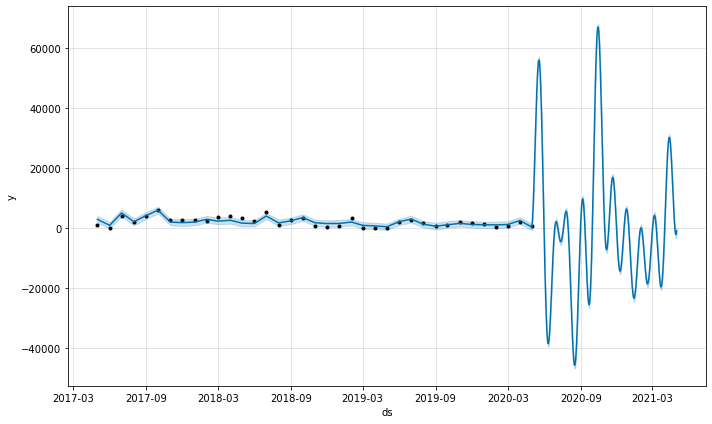

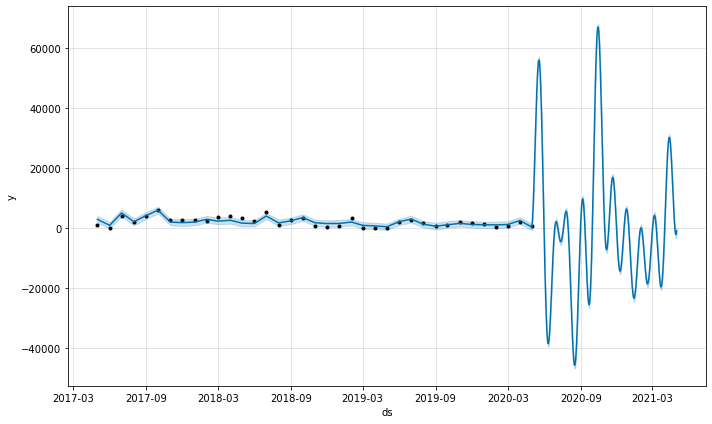

In [174]:
### plot the predicted projection
model.plot(prediction)

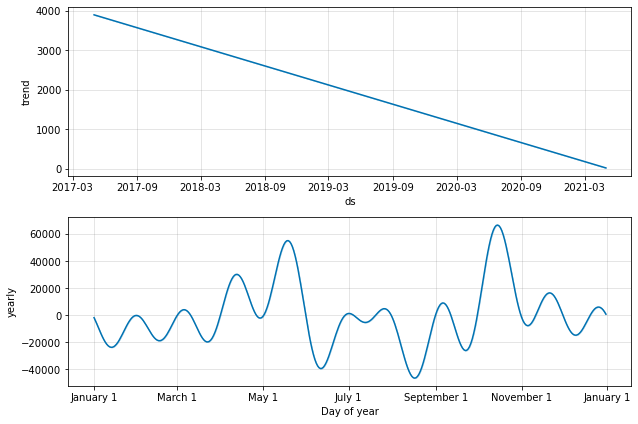

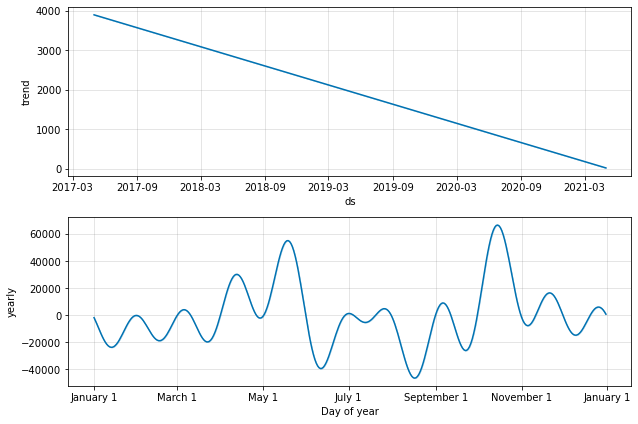

In [175]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [176]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-05-02 00:00:00 and 2019-05-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-06-01,2801.217573,2032.163450,3675.935842,2205.0,2019-05-02
1,2019-07-01,5272.747358,4485.068185,6052.810346,2711.0,2019-05-02
2,2019-08-01,-1059.098686,-1888.624895,-206.744180,1942.0,2019-05-02
3,2019-09-01,907.630585,-3.645757,1713.973272,708.0,2019-05-02
4,2019-10-01,1227.769865,402.657896,2024.752910,1224.0,2019-05-02


In [177]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,3.554754e+05,596.217573,596.217573,0.270393,0.270393,1.0
1,60 days,6.562550e+06,2561.747358,2561.747358,0.944946,0.944946,0.0
2,91 days,9.006593e+06,3001.098686,3001.098686,1.545365,1.545365,0.0
3,122 days,3.985237e+04,199.630585,199.630585,0.281964,0.281964,1.0
4,152 days,1.421188e+01,3.769865,3.769865,0.003080,0.003080,1.0


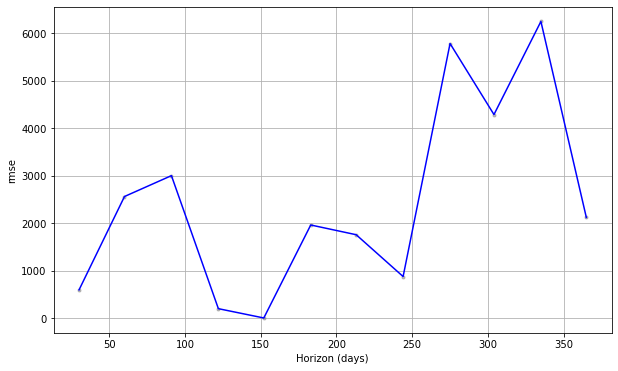

In [178]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [36]:
#combined_dict

# 3.Setup plot
fig,ax=plt.subplots(figsize=(10,5))  #width & height

# 4.Plot data
ax.plot(months_list,lst,marker='o')

# 5.Customize plot
ax.set(title="Simple Plot",xlabel="Months",ylabel='Monthly-Sales')

plt.setp(ax.get_xticklabels(), rotation = 90)
plt.show()